<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%205%20Material%20Balance/notebook/5_materialbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 5 Material Balance**

Unit 5 contains no Examples and Problems. This notebook contains only the material balance equations, Havlena-Odeh plots, Pirson and Sill Drive Indices.

# OGIP and OOIP

In [0]:
def inplace(Gfgi, Nfoi, Rsi, Rvi):

  # Nfoi: initial oil in free-oil phase at time t (STB)
  # Gfgi: initial gas in free-gas phase at time t (scf)
  # Rsi: initial solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rvi: initial volatile oil-gas ratio at time t (STB/scf)
  # G: initial gas in reservoir (OGIP) (scf)
  # N: initial oil in reservoir (OOIP) (STB)

  G = Gfgi + Nfoi * Rsi
  N = Nfoi + Gfgi * Rvi
  return(G, N)

# General Material Balance Equation

In [0]:
def matbalance(Np, Gp, Bo, Bg, Boi, Bgi, Bw, Nfoi, Gfgi, Rs, Rv, Rsi, Rvi, We, Wp, pi, p, cf, cw, swi):
  # Equation 5.24 to 5.31

  # Np: cumulative oil produced at time t (STB)
  # Gp: cumulative gas produced at time t (scf)
  # Bo: oil formation volume factor (FVF) at time t (RB/STB)
  # Bg: gas formation volume factor (FVF) at time t (RB/scf)
  # Boi: initial oil formation volume factor (FVF) at time t (RB/STB)
  # Bgi: initial gas formation volume factor (FVF) at time t (RB/scf)
  # Bw: water formation volume factor (FVF) at time t (RB/STB)
  # Nfoi: initial oil in free-oil phase at time t (STB)
  # Gfgi: initial gas in free-gas phase at time t (scf)
  # Rs: solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rv: volatile oil-gas ratio at time t (STB/scf)
  # Rsi: initial solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rvi: initial volatile oil-gas ratio at time t (STB/scf)
  # We: water encroachment from aquifer (res bbl)
  # Wp: cumulative water produced at time t (STB)
  # pi: initial reservoir pressure (psia)
  # p: current reservoir pressure (psia)
  # cf: isothermal formation compressibility (psi^-1)
  # cw: isothermal water compressibility (psi^-1)
  # swi: initial water saturation

  # right-hand term
  F = (Np * (((Bo - Rs * Bg) / (1 - Rv * Rs)))) + (Gp * (((Bg - Rv * Bo) / (1 - Rv * Rs)))) # F: reservoir voidage from production (res bbl)

  # left-hand term
  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs) # Bto: total oil FVF at time t (RB/STB)
  Eo = Bto - Boi # Eo: oil expansion factor (RB/STB)

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)  # Bto: total gas FVF at time t (RB/scf)
  Eg = Btg - Bgi # Eg: gas expansion factor (RB/scf)
  delta_w = We - Bw * Wp

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  left_term = (Nfoi * Eo) + (Gfgi * Eg) + (delta_w + ((Nfoi * Boi) + (Gfgi * Bgi)) * Efw)
  
  return(F, left_term) # F = left_term (balance)

**Alternative 2: Writing equation in terms of cumulative produced gas-oil ratio (Rp) or Reservoir Voidage Equation Style**

Right-hand term is modified

In [0]:
# Rp is initially: Rs = Gp / Np

def matbalance(Rp, Bo, Bg, Boi, Bgi, Bw, Nfoi, Gfgi, Rs, Rv, Rsi, Rvi, We, Wp, pi, p, cf, cw, swi):
  # Equation 5.24 to 5.31

  # Rp: cumulative produced gas-oil ratio (scf/STB)
  # Bo: oil formation volume factor (FVF) at time t (RB/STB)
  # Bg: gas formation volume factor (FVF) at time t (RB/scf)
  # Boi: initial oil formation volume factor (FVF) at time t (RB/STB)
  # Bgi: initial gas formation volume factor (FVF) at time t (RB/scf)
  # Bw: water formation volume factor (FVF) at time t (RB/STB)
  # Nfoi: initial oil in free-oil phase at time t (STB)
  # Gfgi: initial gas in free-gas phase at time t (scf)
  # Rs: solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rv: volatile oil-gas ratio at time t (STB/scf)
  # Rsi: initial solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rvi: initial volatile oil-gas ratio at time t (STB/scf)
  # We: water encroachment from aquifer (res bbl)
  # Wp: cumulative water produced at time t (STB)
  # pi: initial reservoir pressure (psia)
  # p: current reservoir pressure (psia)
  # cf: isothermal formation compressibility (psi^-1)
  # cw: isothermal water compressibility (psi^-1)
  # swi: initial water saturation

  # right-hand term IS MODIFIED
  F = Np * ((Bo * (1 - Rv * Rp)) + (Bg * (Rp - Rs))) / (1 - Rv * Rs) # F: reservoir voidage from production (res bbl)

  # left-hand term
  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs) # Bto: total oil FVF at time t (RB/STB)
  Eo = Bto - Boi # Eo: oil expansion factor (RB/STB)

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)  # Bto: total gas FVF at time t (RB/scf)
  Eg = Btg - Bgi # Eg: gas expansion factor (RB/scf)

  delta_w = We - Bw * Wp

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p # Efw: formation water expansion factor (RB/STB)

  left_term = (Nfoi * Eo) + (Gfgi * Eg) + (delta_w + ((Nfoi * Boi) + (Gfgi * Bgi)) * Efw)

  return(F, left_term) # F = left_term (balance)

**Alternative 3: Writing equation in terms of gas-cap volume (ratio of vapor-phase reservoir volume to liquid-phase reservoir volume)**

Left-hand term is modified.

In [0]:
# r is initially: r = (Gfgi * Bgi) / (Nfoi * Boi)

def matbalance(r, Np, Gp, Bo, Bg, Boi, Bgi, Bw, Nfoi, Rs, Rv, Rsi, Rvi, We, Wp, pi, p, cf, cw, swi):
  # Equation 5.24 to 5.31

  # r: gas-cap volume
  # Np: cumulative oil produced at time t (STB)
  # Gp: cumulative gas produced at time t (scf)
  # Bo: oil formation volume factor (FVF) at time t (RB/STB)
  # Bg: gas formation volume factor (FVF) at time t (RB/scf)
  # Boi: initial oil formation volume factor (FVF) at time t (RB/STB)
  # Bgi: initial gas formation volume factor (FVF) at time t (RB/scf)
  # Bw: water formation volume factor (FVF) at time t (RB/STB)
  # Nfoi: initial oil in free-oil phase at time t (STB)
  # Rs: solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rv: volatile oil-gas ratio at time t (STB/scf)
  # Rsi: initial solution gas-oil ratio (SGOR) at time t (scf/STB)
  # Rvi: initial volatile oil-gas ratio at time t (STB/scf)
  # We: water encroachment from aquifer (res bbl)
  # Wp: cumulative water produced at time t (STB)
  # pi: initial reservoir pressure (psia)
  # p: current reservoir pressure (psia)
  # cf: isothermal formation compressibility (psi^-1)
  # cw: isothermal water compressibility (psi^-1)
  # swi: initial water saturation

  # right-hand term
  F = (Np * (((Bo - Rs * Bg) / (1 - Rv * Rs)))) + (Gp * (((Bg - Rv * Bo) / (1 - Rv * Rs))))

  # left-hand term IS MODIFIED
  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_w = We - Bw * Wp

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  left_term = (Nfoi * Eo) + (Nfoi * Boi * r * Eg / Bgi) + delta_w + (Nfoi * Boi * (1 + r) * Efw)
  
  return(F, left_term) # F = left_term (balance)

# Material-Balance Plots (Havlena-Odeh)

**Plot 5.1: Dry Gas or Gas/Condensate Reservoirs (No waterdrive)**

Analysis of plot: Slope of straight line is `Gfgi`, it is obtained. 

*   In dry gas reservoir, calculation of `F` and `Eg` is simple because `Np = 0` and `Rv = 0`
*   In condensate-gas reservoir, `original condensate in place = Gfgi * Rvi`

In [0]:
def plot_5_1(F, Gfgi, Bgi, Bo, Bg, Rs, Rvi, Rv, cf, cw, swi, p, pi):

  import matplotlib.pyplot as plt

  # Nfoi = 0

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  x_axis = Eg + (Bgi * Efw)
  y_axis = F
  plt.plot(x_axis, y_axis, '.')
  return()

**Plot 5.2: Undersaturated Oil Reservoirs (No free-gas phase, no waterdrive)**

Analysis of plot: Slope of straight line is `Nfoi`, it is obtained. 

*   In volatile-oil reservoirs, calculation of `Eo` is somewhat more complicated because `Rv != 0` (`Rv` not equal to 0)
*   In all undersaturated reservoirs, `OGIP = Nfoi * Rsi`



In [0]:
def plot_5_2(F, Gfgi, Boi, Bo, Bg, Rv, Rsi, Rs, cf, cw, swi, p, pi):

  import matplotlib.pyplot as plt

  # p > P_bubble (pressure is above bubblepoint), Gfgi = 0, delta_w = 0

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  x_axis = Eo + (Boi * Efw)
  y_axis = F
  plt.plot(x_axis, y_axis, '.')
  return()

**Plot 5.3a: Saturated Oil Reservoirs (with gas cap, no waterdrive)**

Analysis of plot: Slope of straight line is `Gfgi`, intercept is `Nfoi`, both are obtained. 



*   Both the free oil and free gas can be determined
*   `OGIP or G = Gfgi + Nfoi * Rsi`
*   `OOIP or N = Nfoi + Gfgi * Rvi`





In [0]:
def plot_5_3a(F, Gfgi, Boi, Bgi, Bo, Bg, Rv, Rsi, Rvi, Rs, cf, cw, swi, p, pi):

  import matplotlib.pyplot as plt

  # only delta_w = 0

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  x_axis = (Eg + (Bgi * Efw)) / Eo + (Boi * Efw)
  y_axis = F / (Eo + (Boi * Efw))
  plt.plot(x_axis, y_axis, '.')
  return()

**Plot 5.3b (Alternative): Saturated Oil Reservoirs (with gas cap, no waterdrive)**

Analysis of plot: Slope of straight line is `Nfoi`, intercept is `Gfgi`, both are obtained. 

In [0]:
def plot_5_3b(F, Gfgi, Boi, Bgi, Bo, Bg, Rv, Rsi, Rvi, Rs, cf, cw, swi, p, pi):

  import matplotlib.pyplot as plt

  # only delta_w = 0

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  x_axis = Eo + (Boi * Efw) / (Eg + (Bgi * Efw)) 
  y_axis = F / (Eg + (Bgi * Efw)) 
  plt.plot(x_axis, y_axis, '.')
  return()

**Plot 5.4a: Dry Gas or Gas/Condensate Reservoirs (With waterdrive)**

* `delta_w` increases non-linearly with time (`t`) and production (`Gp`)
* If no waterdrive present (`delta_w = 0`), plot will be horizontal and equals to `Gfgi`

In [0]:
def plot_5_4a(F, Gfgi, Bgi, Bo, Bg, Rs, Rvi, Rv, cf, cw, swi, p, pi, Gp, t):
  
  # t: time
  # Gp: cumulative gas produced at time t (scf)

  import matplotlib.pyplot as plt

  # Nfoi = 0

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  # versus time
  x_axis_t = t
  y_axis_t = F / (Eg + Bgi * Efw)

  # versus production 
  x_axis_prod = Gp
  y_axis_prod = F / (Eg + Bgi * Efw)

  plt.subplot(1,2,1)
  plt.plot(x_axis_t, y_axis_t, '.')
  plt.subplot(1,2,2)
  plt.plot(x_axis_prod, y_axis_prod, '.')

  return()

**Plot 5.4b: Undersaturated Oil Reservoirs (With waterdrive)**

* If no waterdrive present (`delta_w = 0`), plot will be horizontal and equals to `Nfoi`

In [0]:
def plot_5_4b(F, Gfgi, Boi, Bo, Bg, Rv, Rsi, Rs, cf, cw, swi, p, pi, Np, t):

  # t: time
  # Np: cumulative oil produced at time t (STB)

  import matplotlib.pyplot as plt

  # p > P_bubble (pressure is above bubblepoint), Gfgi = 0

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  # versus time
  x_axis_t = t
  y_axis_t = F / (Eo + Boi * Efw)

  # versus production 
  x_axis_prod = Np
  y_axis_prod = F / (Eo + Boi * Efw)

  plt.subplot(1,2,1)
  plt.plot(x_axis_t, y_axis_t, '.')
  plt.subplot(1,2,2)
  plt.plot(x_axis_prod, y_axis_prod, '.')
  return()

# **Drive Indices**

**Pirson Drive Indices**



*   `i_dd`: depletion-drive index (measure effect of oil-phase expansion)
*   `i_sd`: segregation-drive index (measure effect of gas-phase expansion)
*   `i_wd`: waterdrive index (measure effect of aquifer expansion)

Other index is `i_fd` (formation drive index)



In [0]:
def pirson(Np, Gp, Bo, Bg, Boi, Bgi, Bw, Nfoi, Gfgi, Rs, Rv, Rsi, Rvi, We, Wp, pi, p, cf, cw, swi):

  # if E_fw want to be neglected, input cf = 0, cw = 0, swi = 0, so later i_fd = 0

  F = (Np * (((Bo - Rs * Bg) / (1 - Rv * Rs)))) + (Gp * (((Bg - Rv * Bo) / (1 - Rv * Rs))))

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_w = We - Bw * Wp

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  i_dd = Nfoi * Eo / F 
  i_sd = Gfgi * Eg / F
  i_wd = delta_w / F
  i_fd = (((Nfoi * Boi) + (Gfgi * Bgi)) * Efw) / F
  return(i_dd + i_sd + i_wd + i_fd) # the result is 1 (balance)

**Sills Drive Indices**

In [0]:
def sills(Np, Gp, Bo, Bg, Boi, Bgi, Bw, Nfoi, Gfgi, Rs, Rv, Rsi, Rvi, We, Wp, pi, p, cf, cw, swi, G_pg, G_inj, W_inj):

  # New terms for Sills:
  # G_pg: gas produced from the vapor phase (scf)
  # G_inj: cumulative gas injected at time t (scf)
  # W_inj: cumulative water injected at time t (STB)

  # if E_fw want to be neglected, input cf = 0, cw = 0, swi = 0, so later i_fd = 0

  F = (Np * (((Bo - Rs * Bg) / (1 - Rv * Rs)))) + (Gp * (((Bg - Rv * Bo) / (1 - Rv * Rs))))

  Bto = ((Bo * (1 - Rv * Rsi)) + (Bg * (Rsi - Rs))) / (1 - Rv * Rs)
  Eo = Bto - Boi

  Btg = ((Bg * (1 - Rs * Rvi)) + (Bo * (Rvi - Rv))) / (1 - Rv * Rs)
  Eg = Btg - Bgi

  delta_w = We - Bw * Wp

  delta_p = p - pi
  Efw = ((cf + cw * swi) / (1 - swi)) * delta_p 

  i_dd = ((Nfoi * Eo) - ((Gp - G_pg - Np * Rs) * Bg)) / (Np * Bo)
  i_sd = ((Gfgi * Eg) - ((G_inj - G_pg) * Bg)) / (Np * Bo)
  i_wd = (We + ((W_inj - Wp) * Bw)) / (Np * Bo)
  i_fd = (((Nfoi * Boi) + (Gfgi * Bgi)) * Efw) / (Np * Bo)
  return(i_dd + i_sd + i_wd + i_fd) # the result is 1 (balance)

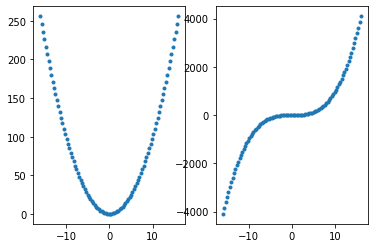

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def square(x):
  y = x**2
  c = x**3
  plt.subplot(1,2,1)
  plt.plot(x, y, '.')
  plt.subplot(1,2,2)
  plt.plot(x, c, '.')
  return()

x = np.linspace(-16, 16, 100)
y = square(x)